<a href="https://colab.research.google.com/github/GiovanniReguzzoni/modelliNLP/blob/main/baselineHateSpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import csv

In [ ]:
dftestl = pd.read_feather('/content/dftestlHSfea')

In [ ]:
dftrain = pd.read_feather('/content/dftrainHSfea')

In [ ]:
#libreria sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
dftrain.head(200)

,text,hs
0,"È terrorismo anche questo, per mettere in uno ...",0
1,@user @user infatti finché ci hanno guadagnato...,0
2,"Corriere: Tangenti, Mafia Capitale dimenticata...",0
3,"@user ad uno ad uno, perché quando i migranti ...",0
4,Il divertimento del giorno? Trovare i patrioti...,0
...,...,...
195,Boldrini accoglie studentessa immigrata a cui ...,0
196,"@user quello è un problema si, ma non il fatto...",0
197,"Roma, nascerà un nuovo campo rom URL URL",0
198,Sfruttamento della #prostituzione e favoreggia...,0


In [ ]:
dftrain = dftrain.rename(columns={'text ': 'text'})
dftestl = dftestl.rename(columns={'text ': 'text'})


In [ ]:
dftrain.columns

Index(['text', 'hs'], dtype='object')

In [ ]:
dftestl.columns

Index(['text', 'hs'], dtype='object')

In [ ]:
#esempio vettori tramite CountVectorizer


testo = ['Minorenne rom arrestato dopo furto in appartamento', 'Toscana, regalati 30mila euro ai rom per fare la spesa in una Coop ', '	Inchiesta a torino - Trovato in Croazia il tesoro della “regina” rom' ]

In [ ]:
testo = ['Minorenne rom arrestato dopo furto in appartamento', 
         'Toscana, regalati 30mila euro ai rom per fare la spesa in una Coop ', 
         'Inchiesta a torino, Trovato in Croazia il tesoro della “regina” rom']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(testo)

count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df.head()

,30mila,ai,appartamento,arrestato,coop,croazia,della,dopo,euro,fare,...,per,regalati,regina,rom,spesa,tesoro,torino,toscana,trovato,una
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,1,1,...,1,1,0,1,1,0,0,1,0,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,1,1,0,1,0


In [ ]:
#split train in train e validation
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (dftrain.text, dftrain.hs, test_size=0.33, random_state=42)

In [ ]:
X_train


857     A #riscopriamoli con @user Lo straniero mister...
4923    GARIBALDI a proposito di rifugiati e di immigr...
3194    Uccisi i 3 terroristi islamici. Nonostate sia ...
4819    Ma cosa aspettano i giovani a darsi una mossa ...
219     Zuckerberg e i big della Silicon Valley contro...
                              ...                        
3772    Penso che chi non vuole vedere che gli attenta...
5191    @user @user Purtroppo lo stato tutela gli immi...
5226    @user Gli italiani li puoi buttare da un ponte...
5390    Che dire di Danilo del GF a cui sono stati mos...
860     Se non sei un immigrato-migrante-richiedente m...
Name: text, Length: 4580, dtype: object

In [ ]:
y_train

857     0
4923    0
3194    1
4819    0
219     0
       ..
3772    1
5191    1
5226    1
5390    0
860     0
Name: hs, Length: 4580, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(dftrain['text'])

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
test_tfidf = tfidf.transform(dftestl['text'])


In [ ]:
X_test_tfidf

<2257x23028 sparse matrix of type '<class 'numpy.float64'>'
	with 64242 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tfidf

<4580x23028 sparse matrix of type '<class 'numpy.float64'>'
	with 130062 stored elements in Compressed Sparse Row format>

# Modelli di classificazione

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [ ]:
ModelloLogisticRegression = LogisticRegression()

ModelloLogisticRegression.fit(X_train_tfidf,y_train)

LogisticRegression()

In [ ]:
predizioneValModelloLogisticRegression = ModelloLogisticRegression.predict(X_test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di validation
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloLogisticRegression)


0.7594151528577758

In [ ]:
predizioneFinModelloLogisticRegression = ModelloLogisticRegression.predict(test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di test
from sklearn import metrics
metrics.accuracy_score(dftestl['hs'], predizioneFinModelloLogisticRegression)


0.764

In [ ]:
from sklearn.metrics import recall_score
#recall
recall_score(dftestl['hs'], predizioneFinModelloLogisticRegression,  average='macro')


0.764

In [ ]:
recall_score(dftestl['hs'], predizioneFinModelloLogisticRegression,  average='micro')

0.764

In [ ]:
from sklearn.metrics import precision_score
precision_score(dftestl['hs'], predizioneFinModelloLogisticRegression,  average='micro')

0.764

In [ ]:
 from sklearn.metrics import f1_score
#f1
f1_score(dftestl['hs'], predizioneFinModelloLogisticRegression, average='macro')

0.7020442792501616

In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
array=confusion_matrix(dftestl['hs'], predizioneFinModelloLogisticRegression)
# (tn, fp, fn, tp)
array

array([[305,  14],
       [104,  77]])

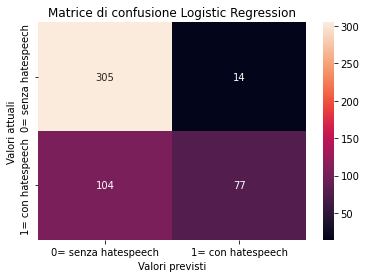

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


ax= plt.subplot()
sns.heatmap(array, annot=True, fmt='g', ax=ax);  


ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 

ax.set_title('Matrice di confusione Logistic Regression'); 
ax.xaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']); ax.yaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']);

In [ ]:
 predizioneFinModelloLogisticRegression

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
df_1 = pd.DataFrame( predizioneFinModelloLogisticRegression)

In [ ]:
df = pd.concat([dftestl, df_1], axis=1)

In [ ]:
df = df.rename(columns={0: 'predizione'})


In [ ]:
df.head(20)

,text,hs,predizione
0,Che fine spero che faccia il killer nigeriano ...,1,0
1,Così i profughi ci svuotano i negozi a Pordenone,1,1
2,Così umiliano gli italiani e coccolano i cland...,1,1
3,"Danno soldi ai clandestini, ma ai disabili inv...",1,0
4,"Emergenza, Minniti annulla il viaggio e torna ...",1,1
5,"Gli immigrati sono matti, parola di scienziati...",1,1
6,Ho chiesto ai profughi di lavorare ma preferis...,1,0
7,Immigrati bomba sociale Subito via 600mila irr...,1,1
8,"Immigrati, così la sinistra ci costringe a ten...",1,0
9,"Immigrati, venite tutti qui. L'ultima ""perla"" ...",1,1


In [ ]:
#calcolo con naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
modelloNaiveBayes = MultinomialNB()


In [ ]:
modelloNaiveBayes.fit(X_train_tfidf,y_train)

MultinomialNB()

In [ ]:
predizioneValModelloNB = modelloNaiveBayes.predict(X_test_tfidf)

In [ ]:
#sul sotto daset di validation
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloNB)

0.7474523704031901

In [ ]:
#sul database di test
predizioneValModelloFin = modelloNaiveBayes.predict(test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di test
from sklearn import metrics
metrics.accuracy_score(dftestl['hs'], predizioneValModelloFin)

0.702

In [ ]:
#calcolo recall NB
from sklearn.metrics import recall_score

recall_score(dftestl['hs'],predizioneValModelloFin,  average='macro')

0.5979580526160827

In [ ]:
from sklearn.metrics import precision_score
precision_score(dftestl['hs'], predizioneValModelloFin,  average='micro')


0.702

In [ ]:
 from sklearn.metrics import f1_score
#f1
f1_score(dftestl['hs'], predizioneValModelloFin, average='macro')

0.5780447329221393

In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
arrayNB=confusion_matrix(dftestl['hs'], predizioneValModelloFin)
# (tn, fp, fn, tp)
arrayNB

array([[311,   8],
       [141,  40]])

In [ ]:
tn, fp, fn, tp = arrayNB.ravel()

In [ ]:
tn, fp, fn, tp

(311, 8, 141, 40)

In [ ]:
tp

40

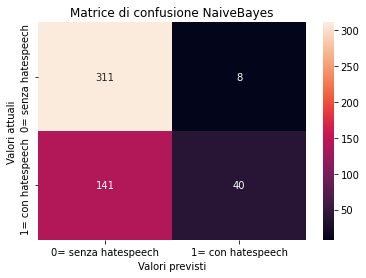

In [ ]:
ax= plt.subplot()
sns.heatmap(arrayNB, annot=True, fmt='g', ax=ax);  



ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 

ax.set_title('Matrice di confusione NaiveBayes'); 
ax.xaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']); ax.yaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']);

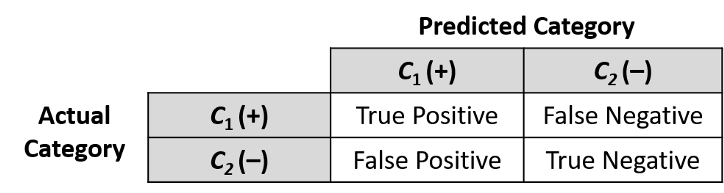